In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from ISLP import confusion_table
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import RocCurveDisplay
roc_curve_est = RocCurveDisplay.from_estimator 
roc_curve_pred = RocCurveDisplay.from_predictions

from sklearn.decomposition import PCA

from sklearn.metrics import (accuracy_score)
from sklearn.ensemble import \
     (RandomForestClassifier as RFC,
      GradientBoostingClassifier as GBC)

import seaborn as sns

In [2]:
cbb_data = pd.read_csv('cbb.csv')
cbb_data

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,Stonehill,NEC,30,4,90.3,114.2,0.0629,46.7,52.7,19.5,...,29.4,47.9,51.7,30.1,35.9,68.1,-22.0,NaN,NaN,2024
3881,St. Francis PA,NEC,28,8,93.1,118.1,0.0608,47.2,53.0,21.2,...,35.4,45.7,52.9,33.2,35.4,65.4,-18.6,NaN,NaN,2024
3882,IUPUI,Horz,29,6,92.1,116.9,0.0607,46.5,58.2,21.3,...,33.4,49.5,59.0,24.7,38.0,67.3,-21.6,NaN,NaN,2024
3883,Coppin St.,MEAC,29,2,85.1,111.1,0.0445,42.1,51.3,22.9,...,38.3,41.9,51.0,28.3,34.5,66.3,-22.9,NaN,NaN,2024


In [3]:
cbb_dd = cbb_data[(cbb_data['SEED'] >= 10)]
cbb_dd

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
26,Xavier,BE,38,24,115.6,97.9,0.8713,51.9,51.6,18.4,...,33.4,52.0,52.5,34.5,33.4,68.4,1.6,E8,11.0,2017
37,Dayton,A10,37,26,113.0,99.1,0.8188,52.4,48.8,18.1,...,43.0,50.4,48.3,37.7,33.2,65.4,0.6,E8,11.0,2014
42,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016
47,Loyola Chicago,MVC,37,32,110.5,95.4,0.8444,57.7,47.4,19.1,...,25.2,56.6,47.1,39.8,32.0,66.4,2.0,F4,11.0,2018
2035,Dayton,A10,36,27,107.0,94.5,0.8059,52.9,47.3,17.9,...,30.6,52.6,46.5,35.6,32.5,63.8,0.8,R32,11.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,Montana St.,BSky,31,17,102.9,105.8,0.4193,53.9,52.3,16.8,...,37.0,53.4,54.1,36.4,32.6,68.5,-12.6,R68,16.0,2024
3587,Stetson,ASun,31,22,108.3,114.0,0.3559,53.4,52.0,15.8,...,25.9,52.5,52.2,36.5,34.5,66.0,-6.8,R64,16.0,2024
3588,Howard,MEAC,32,18,104.5,112.9,0.2913,52.0,50.9,21.4,...,39.1,49.2,50.8,37.5,34.0,67.7,-12.1,R68,16.0,2024
3589,Grambling St.,SWAC,31,20,97.7,106.0,0.2805,48.2,49.1,20.5,...,33.9,47.0,48.4,34.1,33.7,64.9,-8.0,R64,16.0,2024


In [4]:
def determine_cinderella(postseason):
    if postseason not in ['R68', 'R64', 'R32']:
        return True
    return False

cbb_dd.loc[:, 'CINDERELLA'] = cbb_dd['POSTSEASON'].apply(determine_cinderella)
cbb_dd

C:\Users\sethr\AppData\Local\Temp\ipykernel_13812\3006143650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbb_dd.loc[:, 'CINDERELLA'] = cbb_dd['POSTSEASON'].apply(determine_cinderella)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,CINDERELLA
26,Xavier,BE,38,24,115.6,97.9,0.8713,51.9,51.6,18.4,...,52.0,52.5,34.5,33.4,68.4,1.6,E8,11.0,2017,True
37,Dayton,A10,37,26,113.0,99.1,0.8188,52.4,48.8,18.1,...,50.4,48.3,37.7,33.2,65.4,0.6,E8,11.0,2014,True
42,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,True
47,Loyola Chicago,MVC,37,32,110.5,95.4,0.8444,57.7,47.4,19.1,...,56.6,47.1,39.8,32.0,66.4,2.0,F4,11.0,2018,True
2035,Dayton,A10,36,27,107.0,94.5,0.8059,52.9,47.3,17.9,...,52.6,46.5,35.6,32.5,63.8,0.8,R32,11.0,2015,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,Montana St.,BSky,31,17,102.9,105.8,0.4193,53.9,52.3,16.8,...,53.4,54.1,36.4,32.6,68.5,-12.6,R68,16.0,2024,False
3587,Stetson,ASun,31,22,108.3,114.0,0.3559,53.4,52.0,15.8,...,52.5,52.2,36.5,34.5,66.0,-6.8,R64,16.0,2024,False
3588,Howard,MEAC,32,18,104.5,112.9,0.2913,52.0,50.9,21.4,...,49.2,50.8,37.5,34.0,67.7,-12.1,R68,16.0,2024,False
3589,Grambling St.,SWAC,31,20,97.7,106.0,0.2805,48.2,49.1,20.5,...,47.0,48.4,34.1,33.7,64.9,-8.0,R64,16.0,2024,False


In [5]:
cbb_dd.to_csv('cbb_dd.csv', sep=',', encoding='utf-8', index=False, header=True)

In [6]:
cbb_scaled=cbb_dd[['W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']]
scaler = StandardScaler(with_std=True,
                        with_mean=True)
cbb_scaled = scaler.fit_transform(cbb_scaled)
pd.DataFrame(cbb_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.409119,1.501276,-0.426409,1.122307,0.044479,1.346828,0.360232,-0.580235,1.089861,-0.918999,0.900785,0.013600,0.327119,1.599396,-0.351829,0.149207,0.283500,1.017073
1,0.935236,1.021783,-0.180825,0.825341,0.234105,0.097691,0.212598,-0.014906,0.943579,0.132304,0.815380,1.619455,-0.216764,0.094787,0.891293,0.050296,-0.715924,0.760282
2,0.146061,0.818921,-1.306417,1.203761,-0.676101,-0.571489,0.212598,0.680883,0.846058,2.203053,-0.072823,-0.889693,-1.304529,0.023138,0.230885,-1.186093,-0.682610,0.529171
3,2.513587,0.560732,-0.938042,0.970147,2.244143,-0.526877,0.704710,0.246015,-1.933295,-0.791568,-0.619410,-1.358068,1.890783,-0.335102,1.707093,-0.543171,-0.382782,1.119789
4,1.198295,-0.084739,-1.122229,0.752372,0.423731,-0.571489,0.114176,0.985291,-1.640731,0.004873,2.096444,-0.454774,0.531075,-0.550046,0.075494,-0.295893,-1.248950,0.811640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-1.432290,-0.840863,1.190350,-1.434431,0.802984,1.659112,-0.427148,-0.101880,-2.274619,0.068589,-0.875623,0.615796,0.803017,2.172581,0.386275,-0.246437,0.316815,-2.629354
349,-0.116998,0.155007,2.868506,-1.793053,0.613358,1.525276,-0.919260,-2.319708,-0.616759,0.896888,-0.704815,-1.240974,0.497083,1.491924,0.425122,0.693219,-0.516039,-1.139969
350,-1.169232,-0.545790,2.643387,-2.158463,0.082404,1.034544,1.836568,-0.928129,0.821678,0.737600,1.088674,0.967077,-0.624676,0.990388,0.813598,0.445941,0.050302,-2.500959
351,-0.643115,-1.799849,1.231281,-2.219553,-1.358755,0.231528,1.393667,0.072067,-0.470477,1.374753,0.644572,0.097238,-1.372515,0.130611,-0.507220,0.297574,-0.882494,-1.448117


## LDA

In [7]:
cbb_scaled = pd.DataFrame(cbb_scaled, columns=['W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB'])
cbb_scaled

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,0.409119,1.501276,-0.426409,1.122307,0.044479,1.346828,0.360232,-0.580235,1.089861,-0.918999,0.900785,0.013600,0.327119,1.599396,-0.351829,0.149207,0.283500,1.017073
1,0.935236,1.021783,-0.180825,0.825341,0.234105,0.097691,0.212598,-0.014906,0.943579,0.132304,0.815380,1.619455,-0.216764,0.094787,0.891293,0.050296,-0.715924,0.760282
2,0.146061,0.818921,-1.306417,1.203761,-0.676101,-0.571489,0.212598,0.680883,0.846058,2.203053,-0.072823,-0.889693,-1.304529,0.023138,0.230885,-1.186093,-0.682610,0.529171
3,2.513587,0.560732,-0.938042,0.970147,2.244143,-0.526877,0.704710,0.246015,-1.933295,-0.791568,-0.619410,-1.358068,1.890783,-0.335102,1.707093,-0.543171,-0.382782,1.119789
4,1.198295,-0.084739,-1.122229,0.752372,0.423731,-0.571489,0.114176,0.985291,-1.640731,0.004873,2.096444,-0.454774,0.531075,-0.550046,0.075494,-0.295893,-1.248950,0.811640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-1.432290,-0.840863,1.190350,-1.434431,0.802984,1.659112,-0.427148,-0.101880,-2.274619,0.068589,-0.875623,0.615796,0.803017,2.172581,0.386275,-0.246437,0.316815,-2.629354
349,-0.116998,0.155007,2.868506,-1.793053,0.613358,1.525276,-0.919260,-2.319708,-0.616759,0.896888,-0.704815,-1.240974,0.497083,1.491924,0.425122,0.693219,-0.516039,-1.139969
350,-1.169232,-0.545790,2.643387,-2.158463,0.082404,1.034544,1.836568,-0.928129,0.821678,0.737600,1.088674,0.967077,-0.624676,0.990388,0.813598,0.445941,0.050302,-2.500959
351,-0.643115,-1.799849,1.231281,-2.219553,-1.358755,0.231528,1.393667,0.072067,-0.470477,1.374753,0.644572,0.097238,-1.372515,0.130611,-0.507220,0.297574,-0.882494,-1.448117


In [8]:
X=cbb_scaled[['W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB']]
X

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,0.409119,1.501276,-0.426409,1.122307,0.044479,1.346828,0.360232,-0.580235,1.089861,-0.918999,0.900785,0.013600,0.327119,1.599396,-0.351829,0.149207,0.283500,1.017073
1,0.935236,1.021783,-0.180825,0.825341,0.234105,0.097691,0.212598,-0.014906,0.943579,0.132304,0.815380,1.619455,-0.216764,0.094787,0.891293,0.050296,-0.715924,0.760282
2,0.146061,0.818921,-1.306417,1.203761,-0.676101,-0.571489,0.212598,0.680883,0.846058,2.203053,-0.072823,-0.889693,-1.304529,0.023138,0.230885,-1.186093,-0.682610,0.529171
3,2.513587,0.560732,-0.938042,0.970147,2.244143,-0.526877,0.704710,0.246015,-1.933295,-0.791568,-0.619410,-1.358068,1.890783,-0.335102,1.707093,-0.543171,-0.382782,1.119789
4,1.198295,-0.084739,-1.122229,0.752372,0.423731,-0.571489,0.114176,0.985291,-1.640731,0.004873,2.096444,-0.454774,0.531075,-0.550046,0.075494,-0.295893,-1.248950,0.811640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-1.432290,-0.840863,1.190350,-1.434431,0.802984,1.659112,-0.427148,-0.101880,-2.274619,0.068589,-0.875623,0.615796,0.803017,2.172581,0.386275,-0.246437,0.316815,-2.629354
349,-0.116998,0.155007,2.868506,-1.793053,0.613358,1.525276,-0.919260,-2.319708,-0.616759,0.896888,-0.704815,-1.240974,0.497083,1.491924,0.425122,0.693219,-0.516039,-1.139969
350,-1.169232,-0.545790,2.643387,-2.158463,0.082404,1.034544,1.836568,-0.928129,0.821678,0.737600,1.088674,0.967077,-0.624676,0.990388,0.813598,0.445941,0.050302,-2.500959
351,-0.643115,-1.799849,1.231281,-2.219553,-1.358755,0.231528,1.393667,0.072067,-0.470477,1.374753,0.644572,0.097238,-1.372515,0.130611,-0.507220,0.297574,-0.882494,-1.448117


In [9]:
y = cbb_dd['CINDERELLA'] == True
y

26       True
37       True
42       True
47       True
2035    False
        ...  
3586    False
3587    False
3588    False
3589    False
3590    False
Name: CINDERELLA, Length: 353, dtype: bool

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.30,
                                                    shuffle=True) 
Train = pd.merge_ordered(X_train,y_train,left_on=X_train.index,right_on=y_train.index).drop(columns=['key_0'])
Test = pd.merge_ordered(X_test,y_test,left_on=X_test.index,right_on=y_test.index).drop(columns=['key_0'])

In [11]:
lda = LDA(store_covariance=True)

In [12]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [13]:
lda_probs = lda.predict_proba(X_test)[:,1]

lda_test = np.array([True]*len(y_test))
lda_test[lda_probs<.25] = False
lda_test

array([False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False])

In [14]:
lda.coef_

array([[ 1.203845  ,  4.06398835, -4.74168811, -3.42606703,  2.6594509 ,
        -3.97573095,  0.73319841, -0.88086526, -0.34029417,  0.88331909,
        -0.28761972, -0.21024705, -2.26466425,  3.93445977, -1.81632697,
         1.80418933, -0.08817647, -1.91075467]])

In [15]:
accuracy = accuracy_score(lda_test, y_test)
accuracy

0.8679245283018868

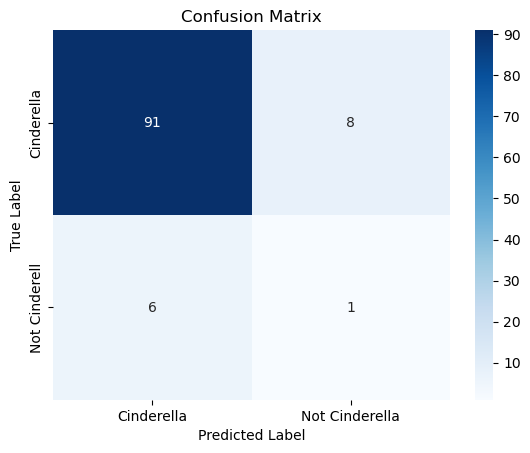

In [16]:
lda_ct = confusion_table(lda_test, y_test)
sns.heatmap(lda_ct, annot=True, fmt='d', cmap='Blues', xticklabels={"Cinderella", "Not Cinderella"}, yticklabels={"Cinderella", "Not Cinderell"})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## PCA

In [17]:
PCA_cbb = PCA()

In [18]:
PCA_cbb.fit(cbb_scaled)

PCA()

In [19]:
PCA_cbb.components_

array([[ 2.56876145e-01,  3.78839451e-01, -1.19822700e-01,
         3.42095762e-01,  3.68151733e-01,  4.18295707e-02,
        -2.68140056e-01, -1.38047814e-01, -1.55354549e-01,
        -2.35397084e-01, -1.76306180e-01, -1.85833097e-01,
         3.24985448e-01,  4.52269868e-02,  2.52807093e-01,
         4.80406450e-03,  2.26409475e-02,  3.37036874e-01],
       [-1.29436411e-01, -7.35171035e-03,  4.49034359e-01,
        -2.95445604e-01,  1.84429249e-01,  4.47343518e-01,
        -9.65276595e-02, -1.22972029e-01, -2.29240270e-01,
         4.42449218e-02, -8.44575017e-02, -8.63442449e-02,
         1.28750371e-01,  3.94276416e-01,  1.56974787e-01,
         2.57281066e-01,  1.36198350e-01, -2.91872992e-01],
       [ 1.78567326e-01,  2.60236139e-01,  6.03580007e-02,
         1.33678102e-01,  9.64957630e-02,  1.60830746e-01,
         4.49109033e-02,  3.55102469e-01,  2.73793379e-01,
         3.46260976e-01,  3.66508991e-01,  4.42749690e-01,
         5.74487948e-02,  8.73011578e-02,  1.10103869e

In [20]:
components = pd.DataFrame(PCA_cbb.components_, 
                          columns=['W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB'])
components

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,0.256876,0.378839,-0.119823,0.342096,0.368152,0.041830,-0.268140,-0.138048,-0.155355,-0.235397,-0.176306,-0.185833,0.324985,0.045227,0.252807,0.004804,0.022641,0.337037
1,-0.129436,-0.007352,0.449034,-0.295446,0.184429,0.447344,-0.096528,-0.122972,-0.229240,0.044245,-0.084458,-0.086344,0.128750,0.394276,0.156975,0.257281,0.136198,-0.291873
2,0.178567,0.260236,0.060358,0.133678,0.096496,0.160831,0.044911,0.355102,0.273793,0.346261,0.366509,0.442750,0.057449,0.087301,0.110104,0.192367,0.331841,0.142132
3,0.225029,-0.220835,0.115709,-0.208356,0.402688,-0.234263,0.489226,-0.019995,-0.015602,-0.098550,0.264515,0.004853,0.365811,-0.230874,0.280315,-0.080379,-0.096890,-0.159757
4,0.224046,-0.276370,-0.107567,-0.092653,0.047061,0.024463,-0.038979,0.539937,-0.229033,-0.058777,-0.315982,0.119312,0.215037,0.274849,-0.210104,-0.423641,0.204770,-0.009088
5,-0.033200,0.094776,0.107944,-0.017488,-0.056391,-0.027624,0.132461,-0.384590,0.329429,-0.186462,0.164761,-0.181700,0.225526,0.137709,-0.409026,-0.271941,0.541188,0.033789
6,0.258378,-0.055296,-0.078437,0.020959,-0.078983,0.320293,0.275171,0.205659,0.377980,-0.344138,-0.099049,-0.173778,0.106113,0.140348,-0.274136,0.425817,-0.324482,0.052194
7,0.370135,-0.180954,0.046247,-0.125024,-0.118029,-0.099288,-0.358842,-0.060963,-0.306984,-0.218493,0.155424,0.133494,0.040425,-0.377872,-0.266674,0.423965,0.271670,-0.056304
8,0.534030,0.036048,0.322633,-0.175113,-0.098042,-0.029813,-0.364250,-0.150767,0.248224,0.026725,0.163019,0.066602,-0.144907,0.182356,0.040306,-0.351754,-0.373149,-0.025658
9,0.135202,0.038037,0.067912,-0.002162,0.024182,-0.067476,-0.034592,0.086254,-0.073715,0.694311,0.003504,-0.530989,0.249763,-0.127407,-0.307600,0.077561,-0.106273,0.043341


In [21]:
cbb_names = cbb_dd['TEAM']
cbb_names

26              Xavier
37              Dayton
42            Syracuse
47      Loyola Chicago
2035            Dayton
             ...      
3586       Montana St.
3587           Stetson
3588            Howard
3589     Grambling St.
3590            Wagner
Name: TEAM, Length: 353, dtype: object

In [22]:
pca_scores = PCA_cbb.transform(cbb_scaled)
display_scores = pd.merge(pd.DataFrame(PCA_cbb.transform(cbb_scaled), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18']), cbb_names, left_index=True, right_index=True)
display_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,TEAM
26,1.677602,0.546701,1.028033,-1.009998,-1.433243,0.105712,0.479489,0.875573,-0.183055,1.641269,-0.647287,-1.116728,0.024027,0.177993,-0.166778,0.011759,0.000279,0.024258,Xavier
37,-1.137435,-3.505735,-1.240340,-0.890615,-0.997992,0.413258,0.038607,0.793746,-1.090283,1.169600,-0.701647,0.760331,-1.009181,0.061149,-0.142683,0.027205,0.152037,-0.072009,Dayton
42,4.246524,2.727276,-1.313546,-0.192134,-0.290005,-0.860806,0.039852,-0.131907,-0.623454,-0.589438,0.055495,1.358121,0.227433,-0.497929,0.237103,0.006585,0.017865,0.000063,Syracuse
47,0.492162,-0.547436,-0.648882,0.427626,-0.557525,0.070134,0.716826,0.269905,0.052980,-0.156915,-1.460727,-0.588985,0.609850,0.574838,-0.490343,0.028980,-0.040982,-0.022372,Loyola Chicago


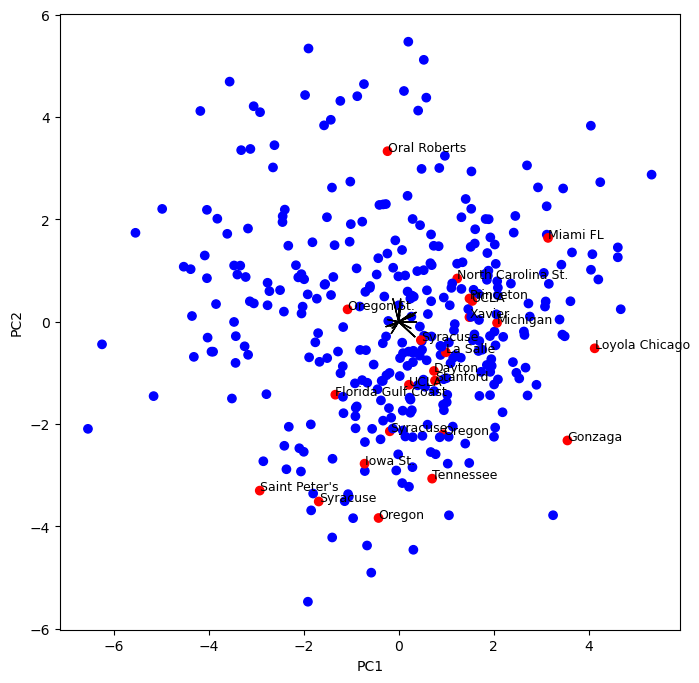

In [23]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
colors = np.where(cbb_dd['CINDERELLA'], 'red', 'blue')
ax.scatter(pca_scores[:,0], pca_scores[:,1], c=colors)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for x, y, is_cinderella, team in zip(pca_scores[:, 0], pca_scores[:, 1], cbb_dd['CINDERELLA'], cbb_dd['TEAM']):
    if is_cinderella:
        ax.text(x, y, team, fontsize=9, ha='left')
for k in range(PCA_cbb.components_.shape[1]):
    ax.arrow(0, 0, PCA_cbb.components_[i,k], PCA_cbb.components_[j,k])

In [24]:
PCA_cbb.explained_variance_

array([4.41174143e+00, 3.75548955e+00, 1.99054845e+00, 1.31168206e+00,
       1.19183958e+00, 1.00863208e+00, 8.12904545e-01, 7.63903633e-01,
       7.07286589e-01, 6.32922543e-01, 5.68786553e-01, 5.18497392e-01,
       1.99807973e-01, 1.06096694e-01, 5.54329368e-02, 8.93023124e-03,
       3.62333970e-03, 3.01077347e-03])

In [25]:
PCA_cbb.explained_variance_ratio_

array([2.44402421e-01, 2.08047265e-01, 1.10272750e-01, 7.26647917e-02,
       6.60257368e-02, 5.58763761e-02, 4.50334277e-02, 4.23188667e-02,
       3.91823858e-02, 3.50627534e-02, 3.15097367e-02, 2.87238089e-02,
       1.10689969e-02, 5.87756317e-03, 3.07088350e-03, 4.94718507e-04,
       2.00726405e-04, 1.66791354e-04])

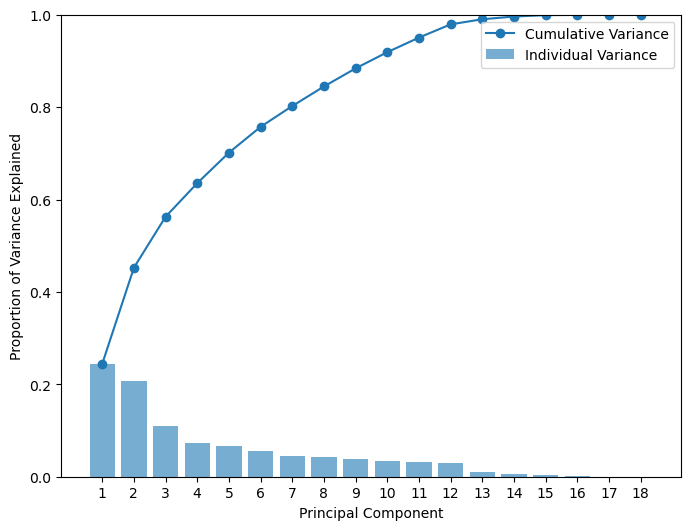

In [26]:
ticks = np.arange(PCA_cbb.n_components_) + 1
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(ticks,
        PCA_cbb.explained_variance_ratio_.cumsum(),
        marker='o',
        label='Cumulative Variance')

ax.bar(ticks,
       PCA_cbb.explained_variance_ratio_,
       alpha=0.6,
       label='Individual Variance')

ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
ax.legend()


## GBM

In [27]:
gbm_cbb = GBC(learning_rate=0.0001,
               n_estimators=6666,
               max_depth=4,
               random_state=314)
gbm_cbb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.0001, max_depth=4, n_estimators=6666,
                           random_state=314)

In [28]:
gbm_pred = gbm_cbb.predict(X_test)
accuracy = accuracy_score(y_test, gbm_pred)
accuracy

#best by percent: .0001, 5000, 4, 314
#0.9150943396226415

0.9150943396226415

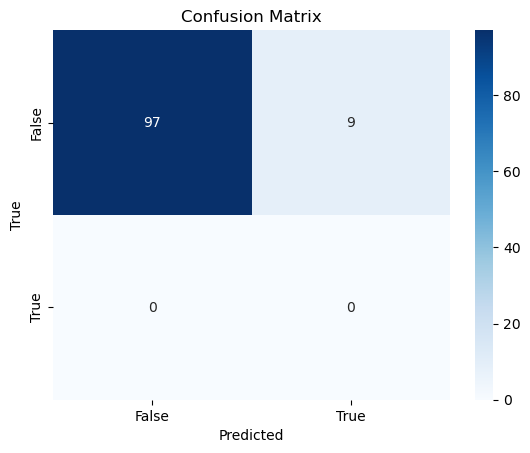

In [29]:
gbm_ct = confusion_table(gbm_pred, y_test)
sns.heatmap(gbm_ct, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
feature_names = list(X_train.columns)
feature_imp = pd.DataFrame(
    {'importance':gbm_cbb.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
EFG_O,0.201006
BARTHAG,0.167728
W,0.158376
TOR,0.136762
FTR,0.052864
TORD,0.043433
DRB,0.037614
WAB,0.035794
3P_D,0.029743
3P_O,0.026112


## Random Forest

In [31]:
rf_cbb = RFC(max_features=12,
             n_estimators=10000,
             max_depth=10,
             min_samples_leaf=2,
             max_leaf_nodes=None,
             bootstrap=True,
             random_state=314)
rf_cbb.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=12, min_samples_leaf=2,
                       n_estimators=10000, random_state=314)

In [32]:
rf_pred = rf_cbb.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
accuracy

0.9150943396226415

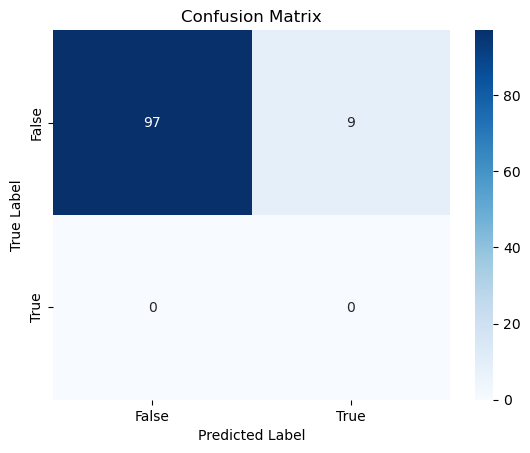

In [33]:
rf_ct = confusion_table(rf_pred, y_test)
sns.heatmap(rf_ct, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Correlation Matrix

In [34]:
correlation_matrix = cbb_scaled.corr(numeric_only=True)
print(correlation_matrix)

                W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D       TOR  \
W        1.000000  0.320004 -0.221736  0.393332  0.383776 -0.144956 -0.242066   
ADJOE    0.320004  1.000000 -0.145087  0.754381  0.545841  0.182673 -0.513632   
ADJDE   -0.221736 -0.145087  1.000000 -0.743966  0.168267  0.648281 -0.048130   
BARTHAG  0.393332  0.754381 -0.743966  1.000000  0.279841 -0.298310 -0.326996   
EFG_O    0.383776  0.545841  0.168267  0.279841  1.000000  0.263784 -0.229178   
EFG_D   -0.144956  0.182673  0.648281 -0.298310  0.263784  1.000000 -0.226130   
TOR     -0.242066 -0.513632 -0.048130 -0.326996 -0.229178 -0.226130  1.000000   
TORD     0.141591 -0.252632 -0.242514 -0.004287 -0.194462 -0.035954  0.219580   
ORB      0.038559  0.031608 -0.144622  0.092540 -0.383812 -0.267997  0.394503   
DRB     -0.247258 -0.124980  0.264245 -0.265998 -0.276986  0.067908  0.183484   
FTR     -0.001328 -0.092864  0.068984 -0.116903 -0.206848 -0.126635  0.371586   
FTRD    -0.048969 -0.120307 

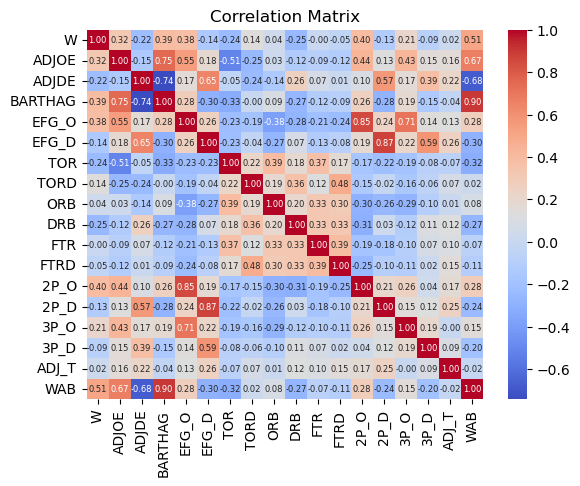

In [35]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6}, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()